# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importing the dataframe

In [15]:
df = pd.read_csv("dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


#  Q1) Data Pre-Processing and Cleaning

In [16]:
# gathering the info of dataframe
print(df.info())

# gathering the number of missing values in each columns or feature
print("\nMissing Values:\n",df.isnull().sum())

# in the column of 'sex' there are only male and female, out of 345 rows there are 328 non-null values in 'sex' column
# remaining are accounted as unknown in this case
# cleaning the data

## filling the null valued places with unknown
df['sex'].fillna('unknown', inplace=True)

## for island we fill the null values with the most repeated one
df['island'].fillna(df['island'].mode()[0], inplace=True)

## gather all the numeric rows and fill the null values places with mean/median/mode
## in this case i have used median
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Handling incorrect data by removing rows with extremely high body mass (likely data entry errors)
df = df[df['body_mass_g'] < 10000]
df['body_mass_g'] = df['body_mass_g'].astype(int)

# printing the dataframe info after cleaning and Checking if there are any missing and null values
print(df.info())
print("\nMissing Values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Missing Values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sp

# dataframe after data pre-processing and cleaning

In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250,female
3,Adelie,Torgersen,44.1,17.3,197.0,4050,unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450,female


# Q2) Average body_mass_g for Gentoo Penguins

In [20]:
# filtering the species by condition and calculating mean for the specified column
avg_bm = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f'Average body mass for Gentoo penguins is: {avg_bm:.2f} g')

Average body mass for Gentoo penguins is: 5069.11 g


# Q3) Skew and Kurtosis Analysis

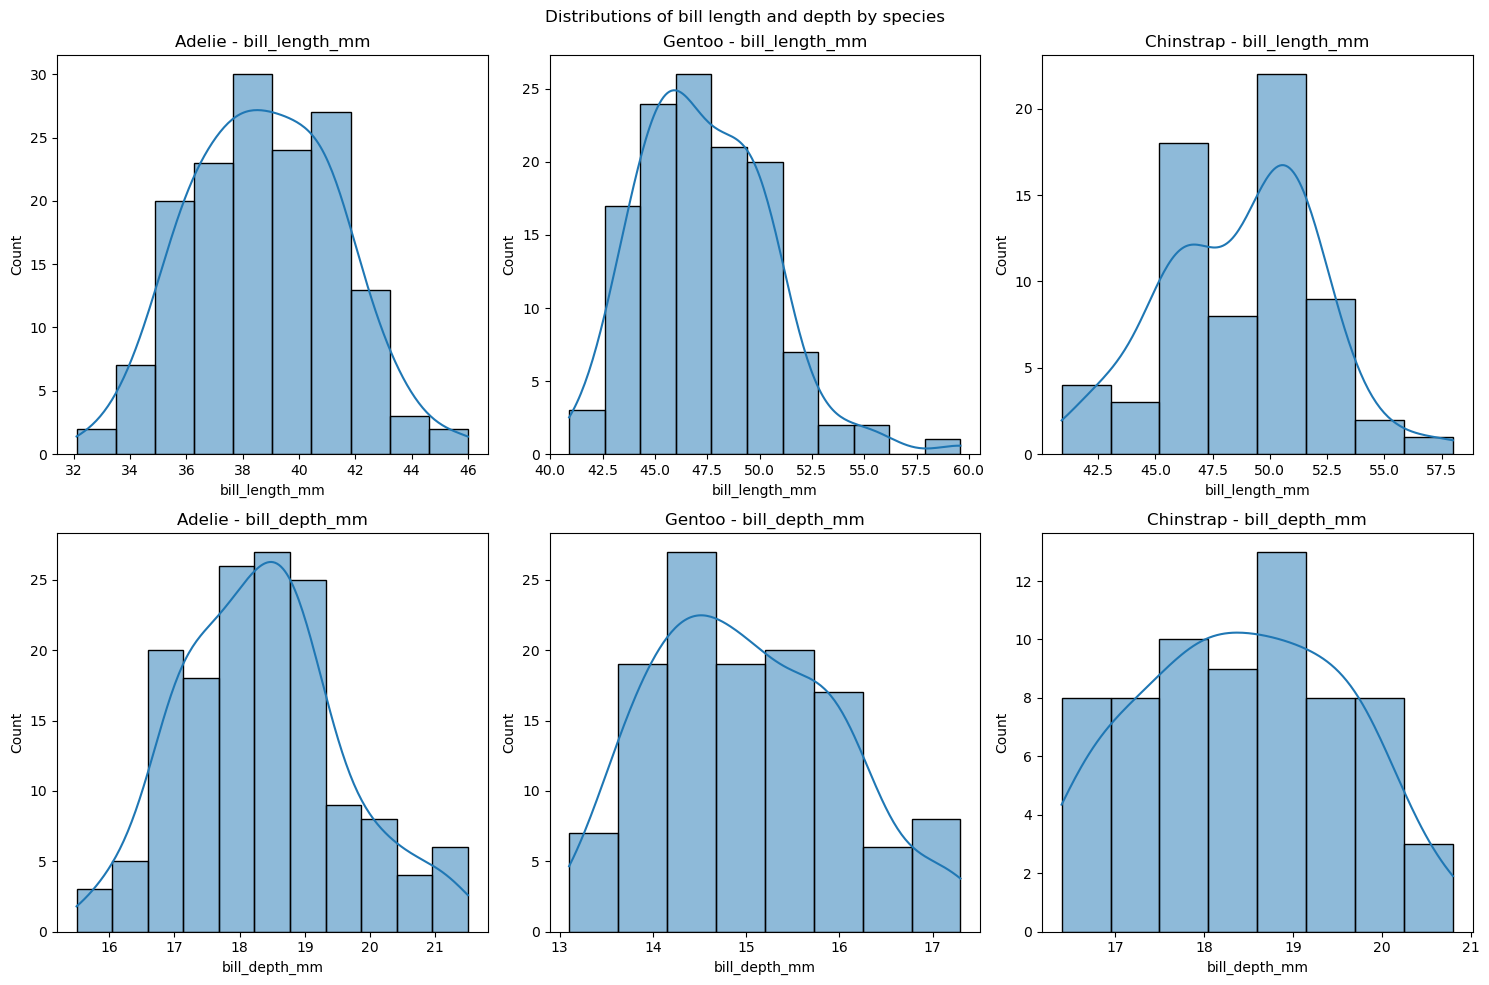


Skewness and Kurtosis for Adelie:
                Skewness  Kurtosis
bill_length_mm  0.106758 -0.300443
bill_depth_mm   0.337698 -0.103177

Skewness and Kurtosis for Gentoo:
                Skewness  Kurtosis
bill_length_mm  0.711964  1.142164
bill_depth_mm   0.333640 -0.597411

Skewness and Kurtosis for Chinstrap:
                Skewness  Kurtosis
bill_length_mm -0.065642 -0.115905
bill_depth_mm   0.017487 -0.925715


In [21]:
# function for calculating Skew and Kurtosis
def skew_kurt(data):
    return pd.DataFrame({
        'Skewness': data.apply(skew),
        'Kurtosis': data.apply(kurtosis)
    })

# Analyzing the bill length and depth for each species
features = ['bill_length_mm','bill_depth_mm']
species = df['species'].unique()

# creating subplots for visualisation
fig,axes = plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Distributions of bill length and depth by species")

# printing the plots for visualisation
for i, feature in enumerate(features):
    for j, sp in enumerate(species):
        data = df[df['species'] == sp][feature]
        sns.histplot(data,kde = True,ax = axes[i,j])
        axes[i,j].set_title(f'{sp} - {feature}')
        axes[i,j].set_xlabel(feature)
        
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for each species and feature
for sp in species:
    data = df[df['species'] == sp][features]
    print(f"\nSkewness and Kurtosis for {sp}:")
    print(skew_kurt(data))


In [22]:
# overall skewness and kurtosis
print("\nOverall Skewness and Kurtosis:")
print(skew_kurt(df[features]))


Overall Skewness and Kurtosis:
                Skewness  Kurtosis
bill_length_mm  0.080487 -0.839370
bill_depth_mm  -0.139079 -0.890439


# Q4) Identifying Outliers and visualizing them

Number Of Outliers in Each Column:
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0             False          False              False        False
1             False          False              False        False
2             False          False              False        False
3             False          False              False        False
4             False          False              False        False
..              ...            ...                ...          ...
339           False          False              False        False
340           False          False              False        False
341           False          False              False        False
342           False          False              False        False
343           False          False              False        False

[341 rows x 4 columns]
Features with outliers: []


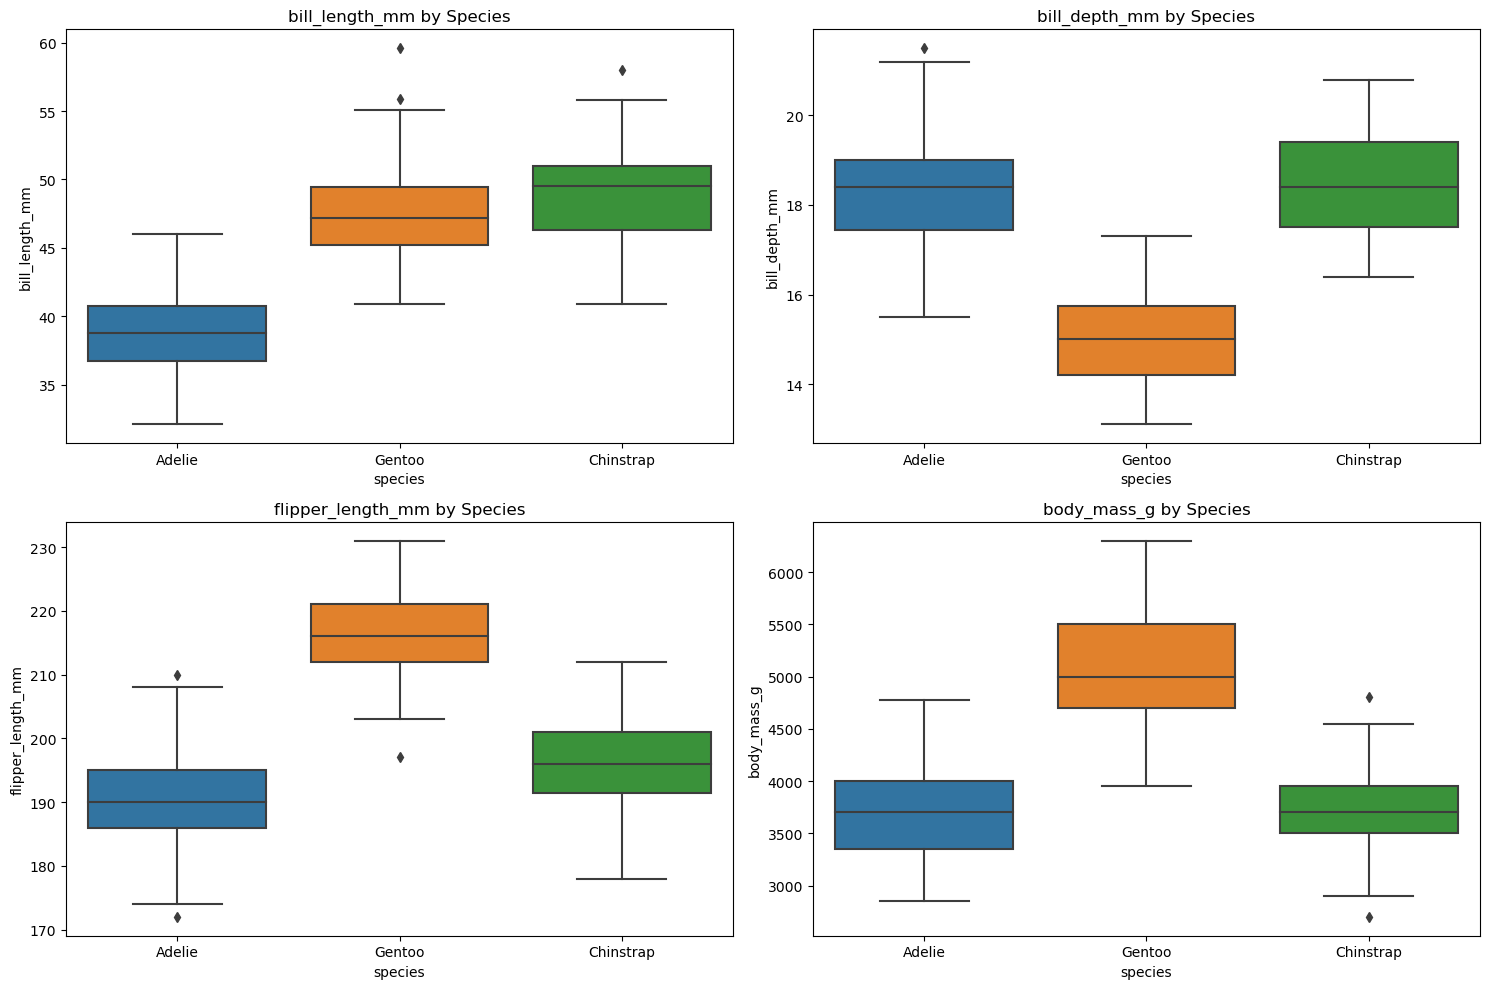

In [28]:
# Function to detect outliers using Inter Quartile Range(IQR)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

# Selecting numeric columns for outlier detection
num_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Applying the function to each column
outliers = df[num_columns].apply(detect_outliers_iqr)
print("Number Of Outliers in Each Column:")
print(outliers)

# Printing the features with outliers
features_with_outliers = outliers.columns[(outliers.sum() > 0)]
print(f"Features with outliers: {list(features_with_outliers)}")

# Visualizing outliers using box plots for each species
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f"{column} by Species")
plt.tight_layout()
plt.show()

# Q5) Curse of Dimensionality

In [35]:
# for checking whether the dataset contribute to the curse of dimensionality
# we can take the ratio of features and samples and if the ratio is near to 1 we an apply
# PCA to reduce the dimensions we desire

num_samples, num_features = df.shape
ratio = num_features / num_samples
print(df.shape)
print(f"Feature to Sample Ratio::{ratio:.3f}")

# as the ratio is barely near to 1 we cannot apply PCA, even if we apply there is no significant
# improvement

(341, 7)
Feature to Sample Ratio::0.021


# Q6) bill_length_mm vs bill_depth_mm Plotting and Visualizing them

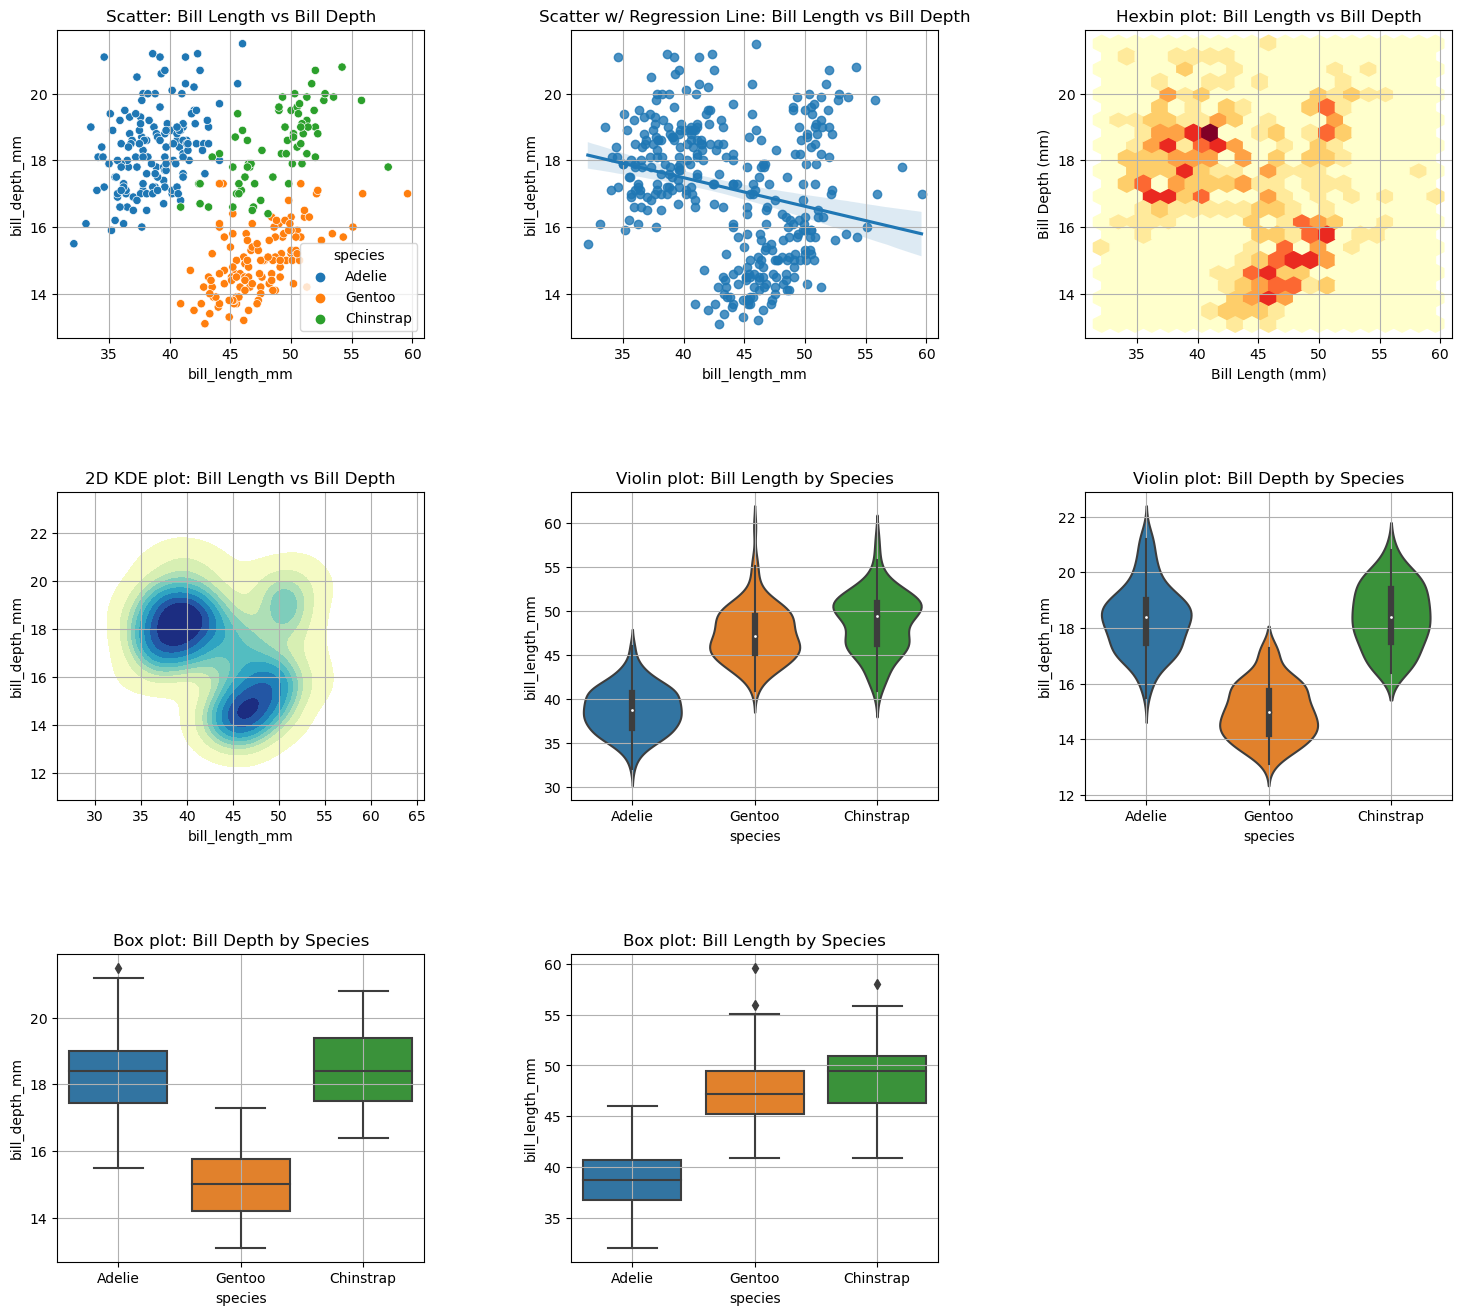

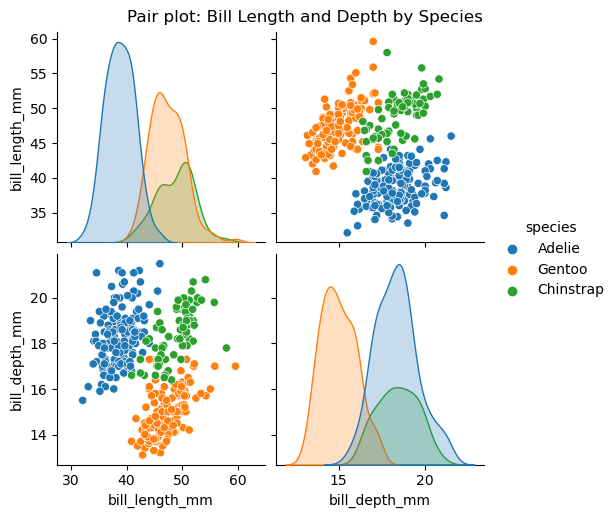

In [49]:
# Creating subplots with 3 rows and 3 columns for 7 plots
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

## Scatter plot
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0, 0])
axes[0, 0].set_title('Scatter: Bill Length vs Bill Depth')
axes[0, 0].grid(True)

## Scatter plot with regression line
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', ax=axes[0, 1])
axes[0, 1].set_title('Scatter w/ Regression Line: Bill Length vs Bill Depth')
axes[0, 1].grid(True)

## Hexbin plot
axes[0, 2].hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=20, cmap='YlOrRd')
axes[0, 2].set_xlabel('Bill Length (mm)')
axes[0, 2].set_ylabel('Bill Depth (mm)')
axes[0, 2].set_title('Hexbin plot: Bill Length vs Bill Depth')
axes[0, 2].grid(True)

## 2D Kernel Density plot
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', fill=True, cmap='YlGnBu', ax=axes[1, 0])
axes[1, 0].set_title('2D KDE plot: Bill Length vs Bill Depth')
axes[1, 0].grid(True)

## Violin plot for bill length
sns.violinplot(data=df, x='species', y='bill_length_mm', ax=axes[1, 1])
axes[1, 1].set_title('Violin plot: Bill Length by Species')
axes[1, 1].grid(True)

## Violin plot for bill depth
sns.violinplot(data=df, x='species', y='bill_depth_mm', ax=axes[1, 2])  # New violin plot added
axes[1, 2].set_title('Violin plot: Bill Depth by Species')
axes[1, 2].grid(True)

## Box plot for bill depth
sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axes[2, 0])  # Moved to the third row
axes[2, 0].set_title('Box plot: Bill Depth by Species')
axes[2, 0].grid(True)

## Box plot for bill length
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[2, 1])
axes[2, 1].set_title('Box plot: Bill Length by Species')
axes[2, 1].grid(True)

sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species')
plt.suptitle('Pair plot: Bill Length and Depth by Species', y=1.02)
plt.grid(True)

fig.delaxes(axes[2,2])

plt.show()


# Q7) Longest Flippers on each island

In [50]:
# Grouping by species and island, then finding the maximum flipper length
max_flipper = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()


print("Maximum flipper length for each combination of species and island:")
print(max_flipper)

# Finding the species with the longest flippers on each island
longest_flippers = max_flipper.loc[max_flipper.groupby('island')['flipper_length_mm'].idxmax()]

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers[['island', 'species', 'flipper_length_mm']])

Maximum flipper length for each combination of species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
      island    species  flipper_length_mm
4     Biscoe     Gentoo              231.0
3      Dream  Chinstrap              212.0
2  Torgersen     Adelie              210.0


# Q8) Z-Score Normalization

In [52]:
# Selecting only the numeric columns for normalization
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transform
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Displaying the first few rows of the normalized dataset
df_normalized.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.875641,0.788528,-1.419612,-0.565065,male
1,Adelie,Torgersen,-0.801837,0.126994,-1.062878,-0.502525,female
2,Adelie,Torgersen,-0.654229,0.432317,-0.420757,-1.190470,female
3,Adelie,Torgersen,0.046912,0.076107,-0.278064,-0.189822,unknown
4,Adelie,Torgersen,-1.318467,1.093851,-0.563451,-0.940308,female
